In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [3]:
#cargando base de datos 
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


### Part 1 - Product Categories

In [9]:
# 1. Frenquency Tables:

freq_table = df['category'].value_counts()
freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [12]:
# Top 5 most listed product categories

top5 = freq_table.head(5)
top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

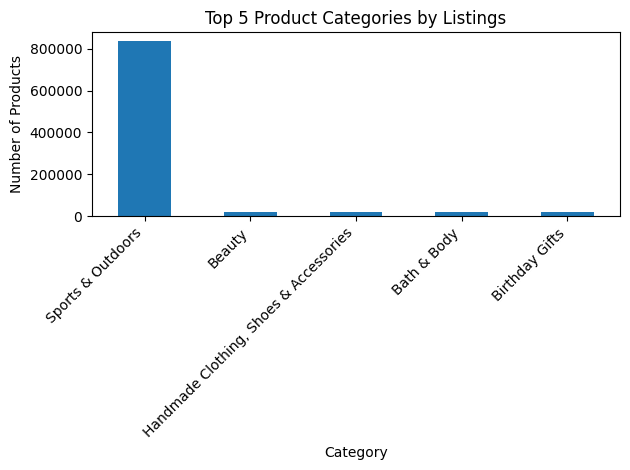

In [14]:
#2. Visualizations:
top10 = freq_table.head(10)

plt.figure()
top5.plot(kind='bar')
plt.title("Top 5 Product Categories by Listings")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

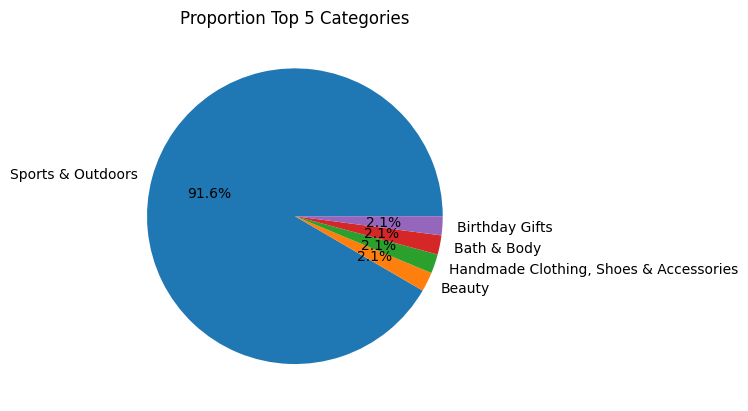

In [16]:
# segunda visualizacion 
plt.figure()
top5.plot(kind='pie', autopct="%1.1f%%")
plt.title("Proportion Top 5 Categories")
plt.ylabel("")
plt.show()

### Delving into Product Pricing

In [17]:
# 1. Measures of Centrality:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

mean > median -> right-skewed\
89.24 > 19.09\
mode = most common price point

In [18]:
# 2. Measures of Dispersion:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

variance_price, std_dev_price, price_range, iqr_price

(119445.48532254907, 345.60886175349884, 100000.0, 36.0)

Large IQR/std -> very diverse pricing strategies

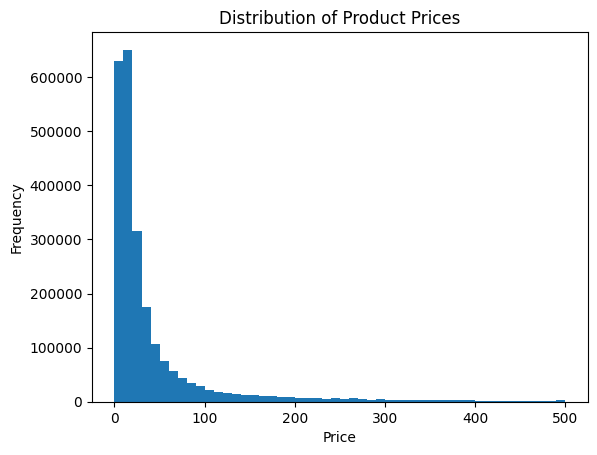

In [23]:
# 3. Visualization:
# histogram 
plt.figure()
plt.hist(df[df['price']< 500]['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")
plt.show()

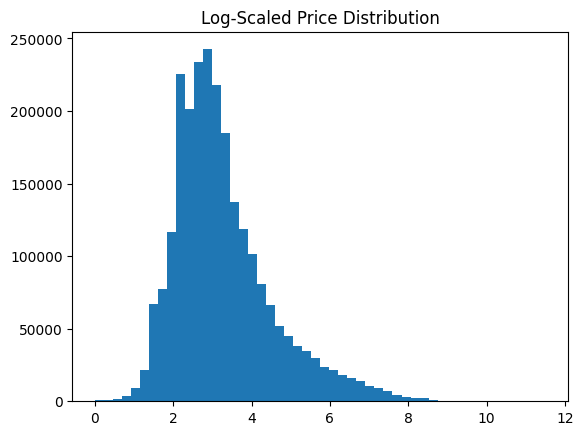

In [24]:
plt.figure()
plt.hist(np.log1p(df['price']), bins=50)
plt.title("Log-Scaled Price Distribution")
plt.show()

<Axes: >

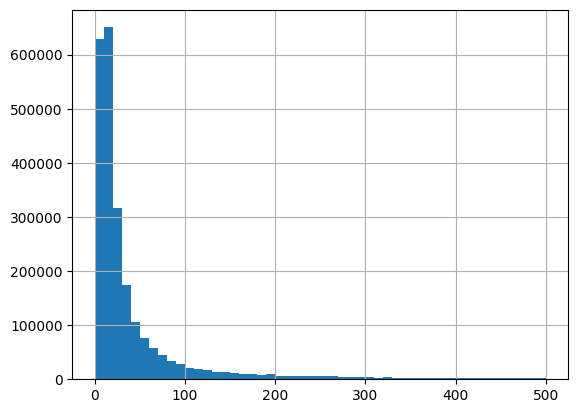

In [25]:
df[df['price'] < 500]['price'].hist(bins=50)

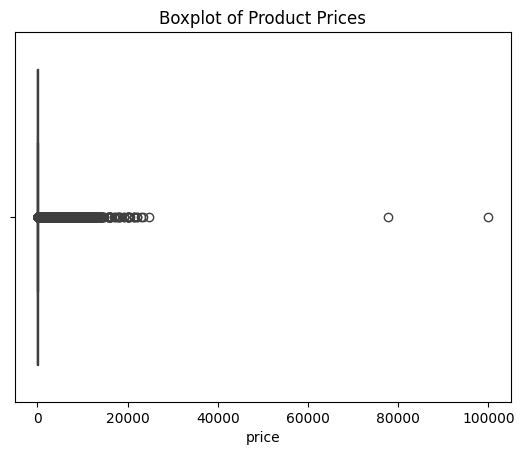

In [27]:
# Box plot 

plt.figure()
sns.boxplot(x=df['price'])
plt.title("Boxplot of Product Prices")
plt.show()

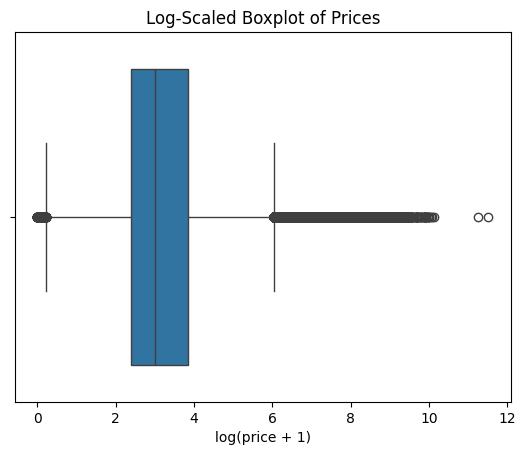

In [36]:
plt.figure()
sns.boxplot(x=np.log1p(df["price"]))
plt.title("Log-Scaled Boxplot of Prices")
plt.xlabel("log(price + 1)")
plt.show()

### 3. Unpacking Product Ratings

In [31]:
# 1. Measures of Centrality:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

In [32]:
# 2. Measures of Dispersion

rating_var = df['stars'].var()
rating_std = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

rating_var, rating_std, rating_iqr

(4.817434029796862, 2.1948653785134207, 4.4)

In [33]:
# 3. skewness and kurtosis

skew = df['stars'].skew()
kurt = df['stars'].kurtosis()

skew, kurt

(0.08120735761080985, -1.9260061280432985)

negative skew -> many high ratings.\
positive skew -> many low ratings.\
High kurtosis -> heavy tails / extremes

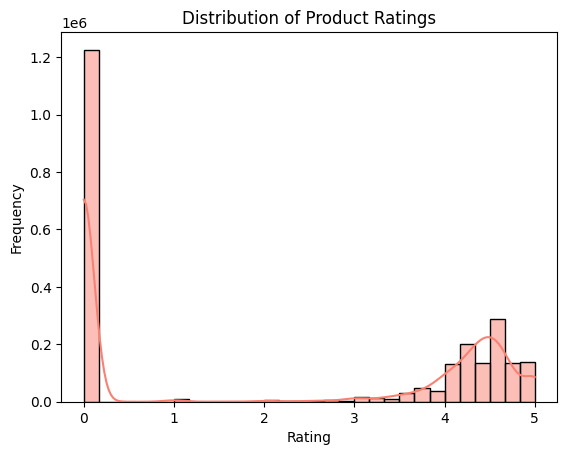

In [34]:
#4. Visualization 

plt.figure()
sns.histplot(df['stars'], kde=True, bins=30, color='salmon')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Product Ratings")
plt.show()

In [39]:
df["rating_clean"] = df["stars"].replace(0, np.nan)

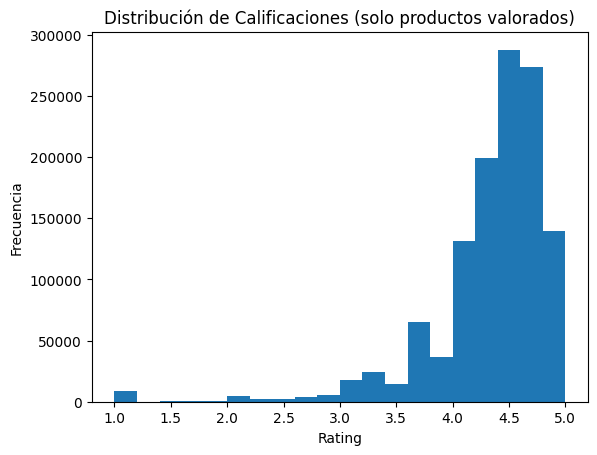

In [40]:
plt.figure()
plt.hist(df["rating_clean"].dropna(), bins=20)
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones (solo productos valorados)")
plt.show()

In [41]:
mean_r = df["rating_clean"].mean()
median_r = df["rating_clean"].median()
mode_r = df["rating_clean"].mode()[0]

var_r = df["rating_clean"].var()
std_r = df["rating_clean"].std()
iqr_r = df["rating_clean"].quantile(0.75) - df["rating_clean"].quantile(0.25)

skew_r = df["rating_clean"].skew()
kurt_r = df["rating_clean"].kurtosis()

mean_r, median_r, mode_r, var_r, std_r, iqr_r, skew_r, kurt_r

(4.319160762226909,
 4.4,
 4.5,
 0.30834337523872846,
 0.555286750462073,
 0.5,
 -2.379568112212788,
 9.78193769066431)